### GitHub repository
Link to repository used to colaborate on the assignment:
https://github.com/KarolineKlan/Assignments_ComSocSci2024.git

### Contribution statement

Team members:

- Jacob (s214596)
- Kristoffer (s214609)
- Karoline (s214638)

All members collaborated and contributed to every part of the assignment.

# Assignment 2

In [1]:
#Import relevant libraries
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from itertools import product
import networkx as nx
import random
from tqdm import tqdm
from joblib import Parallel, delayed

## Part 1: Properties of the real-world network of Computational Social Scientists
In this part of the assignment we are analyzing the CSS-network by comparing with a Random Model.

### 1.1 The random model
Building a random model from the CSS-network 

In [2]:
#load the CSS-network that was created in assignment 1
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data)
    return G

file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)


print(f'The number of nodes in G is {G.number_of_nodes()} and the amount of edges are {G.number_of_edges()}')
print(f'The denisty of G is {nx.density(G)}')
print(f'Is the graph fully connected: {nx.is_connected(G)}')

The number of nodes in G is 8478 and the amount of edges are 23778
The denisty of G is 0.0006617130855140186
Is the graph fully connected: False


We calculate p and k for the CSS-network using equation 3.2 from the network science text-book [1]


In [3]:
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) 

#calculate the average degree using p
k = p*(N-1)
print(f'Average degree of the CSS-network: {k}')

Average degree of the CSS-network: 5.6093418259023355


In [4]:
#CHECK LIGE OM EN AF JER ANDRES FUNKTIONER ER BEDRE!
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)



In [5]:
# Print some information about the generated random network
print(f'The number of nodes in G is {random_network.number_of_nodes()} and the amount of edges are {random_network.number_of_edges()}')
print(f'The denisty of G is {nx.density(random_network)}')
print(f'Is the graph fully connected: {nx.is_connected(random_network)}')
print(f'The average degree of the random network is {np.mean([degree for node, degree in random_network.degree()])}')

The number of nodes in G is 8478 and the amount of edges are 23783
The denisty of G is 0.0006618522294885989
Is the graph fully connected: False
The average degree of the random network is 5.610521349374853


TypeError: 'NoneType' object is not subscriptable

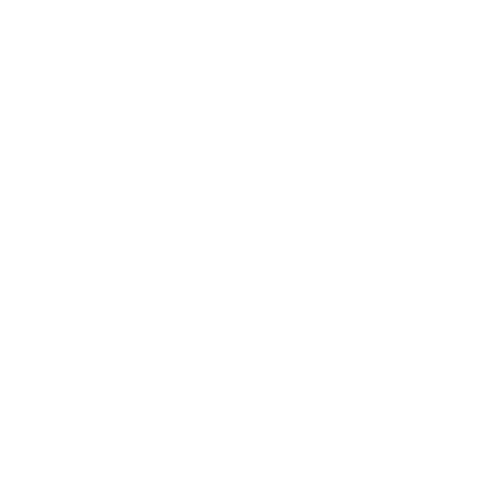

In [6]:
network, config = nw.visualize(random_network, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Random network')

Text(0.5, 1.0, 'CSS-network')

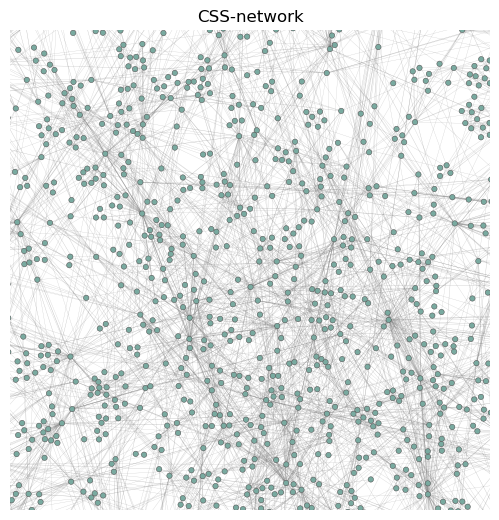

In [7]:
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('CSS-network')

> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

### Questions about the regime of the random network

**What regime does it fall into:** 

The average degree of our the random network < k > = 5.6 which is above the critical threshold of < k > = 1, meaning that a substantial portion of the network is connected. Since the average degree does not fall above log(N)=9 we are not in a fully connected regime, but we fall in the category of the Supercritical Regime.

**The networks structure:**

 In the supercritial regime the network begins to exhibit characteristics resembling those found in actual networks. The supercritical regime is characterized by the coexistence of multiple isolated components along with the giant component. In this regime, smaller components tend to resemble trees, whereas the giant component is characterized by the presence of loops and cycles in the connections. [1] 

**Differences:**

In the real CSS-network, connections may be more unevenly distributed, leading to regions of sparse connectivity and regions with denser connectivity, and specific structural patterns, such as communities and hubs. In the random network the connection tends to have a more uniform distribution, being very dense in the middle and more sparse in the "edges". This aligns with the expectations since Real-world networks often evolve through complex processes and the random network, being uniformly generated, lack the complex structural patterns.

### 1.2 Degree distribution

In [8]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
CSS_degrees = [degree for node, degree in G.degree()]   


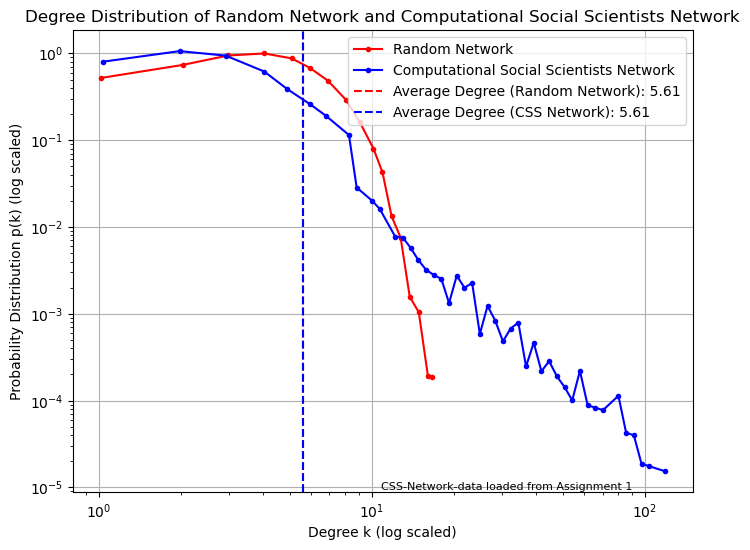

In [9]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_css = np.logspace(np.log10(min(CSS_degrees)), np.log10(max(CSS_degrees)), 75)

# define the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# define the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(CSS_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_css, yy_css, marker='.', label='Computational Social Scientists Network', color='b')

# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_css = np.mean(CSS_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree (CSS Network): {avg_degree_css:.2f}')

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability Distribution p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

 
data_source = "CSS-Network-data loaded from Assignment 1" 
plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


#### Questions:
> * Answer the following questions: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?

** ANSWER QUESTIONS BETTER HERE **

We can see that the CSS network is approximately a straight line in log-log-scale meaning it ia obviously a heavy tailed distribution. The mean of the two networks are approximately almost idential, meaning that average is not a meaningful measure when handeling heavy tailed distributions, as they can be misleading

## Part 2 Network Analysis in Computational Social Science
In this part of the assignment we are analyzing the CSS-network by looking at assortativity

### 2.1 Assortativity Coefficient

In [13]:
def assort_value(network):
    countries = set()
    n_edges = network.number_of_edges()
    for node in network.nodes.data():
        if node[1]['country_code'] not in countries:
            countries.add(node[1]['country_code'])
            
    subgraph = dict()
    for country in countries:
        nodes = (node for node, data in network.nodes(data=True) if data.get("country_code")==country)
        subgraph[str(country)] = network.subgraph(nodes)
    
    e = dict()
    for country in countries:
        e[str(country)] = subgraph[str(country)].number_of_edges() / n_edges
    
    a = dict()
    for node in network.nodes:
        country = str(network.nodes[node]['country_code'])
        if country not in a:
            a[country] = 0
        a[country] += network.degree[node]
    for country in countries:
        a[country] /= (2*n_edges-1)
    N1 = sum([e[country] for country in countries])
    N2 = sum([a[country]*a[country] for country in countries])
    nominator = N1-N2
    denominator = 1- sum([a[country]*a[country] for country in countries])
    r = nominator / denominator
    return r
print(f'The assortativity coefficient of the CSS-network using our build-in function: {assort_value(G)}')
print(f'The assortativity coefficient of the CSS-network using the networkx function: {nx.attribute_assortativity_coefficient(G, "country_code")}')

The assortativity coefficient of the CSS-network using our build-in function: 0.4314288173722251
The assortativity coefficient of the CSS-network using the networkx function: 0.4314250091589879


### 2.2 Configuration model

In [14]:
def shuffle_net(network):
    n_edges = network.number_of_edges()
    new_network = network.copy()
    edges = list(new_network.edges)
    e = len(edges)
    for _ in range(n_edges*10):
        idx1, idx2 = random.randint(0,e-1), random.randint(0,e-1)
        if idx1 != idx2:
            u,v  = edges[idx1]
            x,y = edges[idx2]
            prob = np.random.random()
            if u != y and v != x and u != x and v != y:
                if prob < 0.5:
                    new_network.remove_edge(u,v)
                    new_network.add_edge(v,u)
                if y not in new_network.neighbors(u):
                    if x not in new_network.neighbors(v):
                        new_network.remove_edge(u,v)
                        new_network.remove_edge(x,y)
                        new_network.add_edge(u,y)
                        new_network.add_edge(x,v)
                        edges[idx1] = (u,y)
                        edges[idx2] = (x,v)
    return new_network

In [ ]:
print(f"""
      Number of edges in the random network: {shuffle_net(G).number_of_edges()}
      Number of edges in the original network: {G.number_of_edges()}""")


      Number of edges in the random network: 23778
      Number of edges in the original network: 23778


### 2.3 Analyzing Assortativity in Random Network

In [ ]:
network_list_100 = Parallel(n_jobs=4)(delayed(shuffle_net)(G) for _ in tqdm(range(100)))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


In [ ]:
assort_value_list = Parallel(n_jobs=4)(delayed(assort_value)(network) for network in tqdm(network_list_100))

100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


In [ ]:
assort_value_list = Parallel(n_jobs=4)(delayed(nx.attribute_assortativity_coefficient)(network, 'country_code') for network in tqdm(network_list_100))

100%|██████████| 100/100 [00:02<00:00, 41.89it/s]


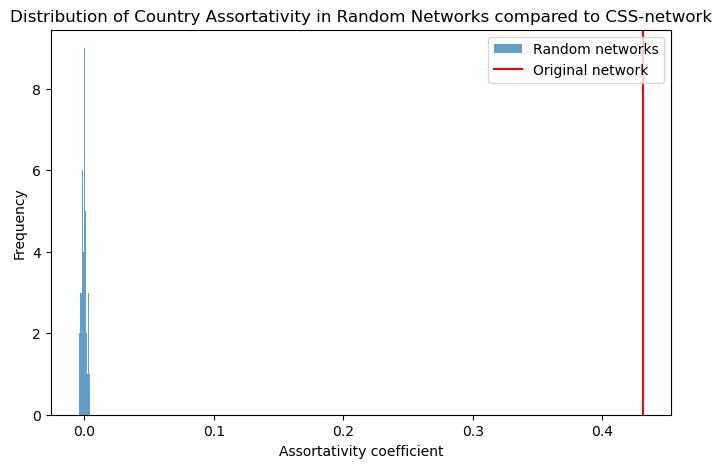

In [ ]:
assort_value_CSS = nx.attribute_assortativity_coefficient(G, 'country_code')

plt.figure(figsize=(8, 5))
plt.hist(assort_value_list, bins=30, alpha=0.7, label='Random networks')
plt.axvline(assort_value_CSS, color='red', label='Original network')
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Country Assortativity in Random Networks compared to CSS-network')
plt.legend(loc='upper right')
plt.show()

### 2.4 Assortativity by Degree

In [17]:
def degree_assortativity(network):
    # Calculate degree assortativity
    num_edges = network.number_of_edges()
    degrees = dict(network.degree())

    kukv = sum(degrees[node1]*degrees[node2] for (node1, node2) in network.edges)  / num_edges
    kuv = [(degrees[node1], degrees[node2]) for (node1,node2) in network.edges] 
    ku = sum([ku[0] for ku in kuv]) / num_edges
    kv = sum([kv[1] for kv in kuv]) / num_edges 
 
    norm_term = np.sqrt(sum([ku[0]**2 for ku in kuv])/num_edges - ku**2)*np.sqrt(sum([kv[1]**2 for kv in kuv]) / num_edges - kv**2)
    return (kukv-ku*kv) / norm_term

print(f'The degree assortativity coefficient of the CSS-network using our own function: {degree_assortativity(G)}')
print(f'The degree assortativity coefficient of the CSS-network using the networkx function: {nx.degree_assortativity_coefficient(G)}')

The degree assortativity coefficient of the CSS-network using our own function: -0.07912503849715283
The degree assortativity coefficient of the CSS-network using the networkx function: -0.10595217811904795


In [18]:
degree_value_CSS = nx.degree_assortativity_coefficient(G)
degree_value_random = Parallel(n_jobs=4)(delayed(nx.degree_assortativity_coefficient)(G) for G in network_list_100)

plt.figure(figsize=(8, 5))
plt.hist(degree_value_random, bins=30, alpha=0.7, label='Random networks')
plt.axvline(degree_value_CSS, color='red', label='Original network')
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Assortativity in Random Networks compared to CSS-network')
plt.legend(loc='upper right')
plt.show()

NameError: name 'network_list_100' is not defined

### 2.5 Reflection questions 

> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?    
> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?    
> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations. 

### Central nodes

In [ ]:
def top_closeness_centrality(G, top=5):
    closeness = nx.closeness_centrality(G)
    sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

    return sorted_closeness[:top]

def top_eigenvector_centrality(G, top=5):
    eigenvector = nx.eigenvector_centrality_numpy(G)
    sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

    return sorted_eigenvector[:top]

top_5_eigenvector = top_eigenvector_centrality(G)
top_5_closeness = top_closeness_centrality(G)

print(f"Top 5 nodes by eigenvector centrality: {top_5_eigenvector}")
print(f"Top 5 nodes by closeness centrality: {top_5_closeness}")

Top 5 nodes by eigenvector centrality: [('https://openalex.org/A5046546654', 0.2699387982164817), ('https://openalex.org/A5031799782', 0.232655892227743), ('https://openalex.org/A5025218537', 0.2016626766089306), ('https://openalex.org/A5014662127', 0.20135167006925966), ('https://openalex.org/A5039841997', 0.20129669172286213)]
Top 5 nodes by closeness centrality: [('https://openalex.org/A5038976962', 0.14292778570762626), ('https://openalex.org/A5014662127', 0.14020683981165794), ('https://openalex.org/A5082358191', 0.1393975802887392), ('https://openalex.org/A5044033087', 0.13936623973035), ('https://openalex.org/A5046546654', 0.138939326821467)]


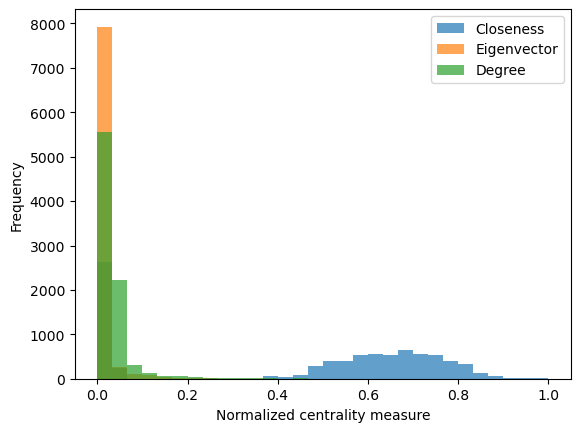

In [ ]:
closeness = nx.closeness_centrality(G)
closeness_values = [closeness[node] for node in G.nodes]

eigencentrality = nx.eigenvector_centrality_numpy(G)
eigen_values = [eigencentrality[node] for node in G.nodes]

degrees = [deg for node, deg in G.degree()]

def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(value-min_val)/(max_val-min_val) for value in values]

normalized_closeness = normalize(closeness_values)
normalized_eigen = normalize(eigen_values)
normalized_degrees = normalize(degrees)

plt.hist(normalized_closeness, bins=30, alpha=0.7, label='Closeness')
plt.hist(normalized_eigen, bins=30, alpha=0.7, label='Eigenvector')
plt.hist(normalized_degrees, bins=30, alpha=0.7, label='Degree')
plt.xlabel('Normalized centrality measure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text questions:
> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 
> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?    
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

## Part 3 - Words that characterize Computational Social Science communities

### 3.1 TF-IDF and the Computational Social Science communities

In [19]:
#load the CSS-network from week 6 exercise 4
file_path = 'data/network_with_attributes_and_communities.json'
G_CSS = load_network_from_json(file_path)

print("Nodes:", len(G_CSS.nodes))
print("Edges:", len(G_CSS.edges))

Nodes: 8478
Edges: 23778


In [20]:
#load the abstracts dataset from week 7 exercise 2
df_abstracts = pd.read_csv('data/Abstracts_TOKENIZED.csv')
df_abstracts['Tokens'] = df_abstracts['Tokens'].apply(ast.literal_eval)
df_abstracts.head()

,Unnamed: 0,id,title,abstract_inverted_index,Text,Tokens
0,https://openalex.org/W2043890595,https://openalex.org/W2043890595,The role of the airline transportation network...,"{'The': [0], 'systematic': [1], 'study': [2, 8...",The systematic study of large-scale networks h...,"[systematic, study, networks, unveiled, ubiqui..."
1,https://openalex.org/W2095072199,https://openalex.org/W2095072199,Finding local community structure in networks,"{'Although': [0], 'the': [1, 18, 26, 46, 57, 7...",Although the inference of global community str...,"[although, inference, global, community_struct..."
2,https://openalex.org/W1965715402,https://openalex.org/W1965715402,Velocity and Hierarchical Spread of Epidemic O...,"{'We': [0], 'study': [1], 'the': [2, 5, 12, 27...",We study the effect of the connectivity patter...,"[study, effect, connectivity, pattern, complex..."
3,https://openalex.org/W2096296558,https://openalex.org/W2096296558,Dynamical patterns of epidemic outbreaks in co...,"{'We': [0, 20], 'present': [1], 'a': [2, 68, 8...",We present a thorough inspection of the dynami...,"[present, thorough, inspection, dynamical, beh..."
4,https://openalex.org/W2102017123,https://openalex.org/W2102017123,Systematic inequality and hierarchy in faculty...,"{'The': [0], 'faculty': [1, 26, 48, 66, 76, 11...",The faculty job market plays a fundamental rol...,"[faculty, job, market, plays, fundamental, rol..."


#### 3.1.1 What does TF and IDF stand for 
WRITE HERE

#### 3.1.2 large documents for each community

In [24]:

df_community = pd.DataFrame(columns=['author_ids', 'degree', 'community'])

for i, node in enumerate(G_CSS.nodes()):
    df_community.loc[i] = [node, G_CSS.degree(node), G_CSS.nodes[node]['community']]

com_list = df_community['community'].sort_values()

In [56]:
df_abstracts.Tokens

0       [systematic, study, networks, unveiled, ubiqui...
1       [although, inference, global, community_struct...
2       [study, effect, connectivity, pattern, complex...
3       [present, thorough, inspection, dynamical, beh...
4       [faculty, job, market, plays, fundamental, rol...
                              ...                        
3560    [analyze, diffusive, motion, kink, solitons, g...
3561    [working, within, framework, nonlinear, models...
3562    [study, problem, front, propagation, presence,...
3563    [dielectric, spectra, tibo, single, crystals, ...
3564    [study, possibility, kink, motion, induced, pu...
Name: Tokens, Length: 3565, dtype: object

In [27]:
#load the papers dataset from assignment 2
df_papers = pd.read_csv('data/IC2S2_all_papers.csv')
df_papers = df_papers.drop_duplicates(subset=["id"])
df_papers['author_ids'] = df_papers['author_ids'].apply(ast.literal_eval) # convert string to list
Long_paper_df = df_papers.explode("author_ids")

Long_paper_df.head()

,id,publication_year,cited_by_count,author_ids
0,https://openalex.org/W2043890595,2006,1006,https://openalex.org/A5025218537
0,https://openalex.org/W2043890595,2006,1006,https://openalex.org/A5014662127
0,https://openalex.org/W2043890595,2006,1006,https://openalex.org/A5061287527
0,https://openalex.org/W2043890595,2006,1006,https://openalex.org/A5046546654
1,https://openalex.org/W2095072199,2005,713,https://openalex.org/A5014647140


In [58]:
df_community

,author_ids,degree,community
0,https://openalex.org/A5000017075,4,0
1,https://openalex.org/A5020270223,10,0
2,https://openalex.org/A5037087050,11,1
3,https://openalex.org/A5048877432,52,2
4,https://openalex.org/A5037077388,2,3
...,...,...,...
8473,https://openalex.org/A5061448486,3,180
8474,https://openalex.org/A5025105803,2,34
8475,https://openalex.org/A5028950652,2,34
8476,https://openalex.org/A5025324527,2,2


In [93]:
# Merge df_papers with df_abstracts on id
df_merged_papers = pd.merge(Long_paper_df, df_abstracts, on='id')


# Merge df_merged with df_community on author_ids
df_merged_authors = pd.merge(df_merged_papers, df_community, on='author_ids')

# Define a function to extract tokens and concatenate them for each community
def concatenate_tokens(group):
    tokens_list = group['Tokens'].explode().tolist() #should be list of strings
    return tokens_list

# Group by community and apply the function to concatenate tokens
community_tokens = df_merged_authors.groupby('community').apply(concatenate_tokens)

# Reset index to convert the groupby result back to a DataFrame
community_tokens = community_tokens.reset_index(name='Tokens')

community_tokens

,community,Tokens
0,0,"[content, online, shaped, many, factors, inclu..."
1,1,"[abstract, fight, pandemic, lockdowns, succeed..."
2,2,"[persuasion, core, norm, creation, emergence, ..."
3,3,"[learning, perceive, produce, speech, children..."
4,4,"[recurring, theme, sociological, research, tra..."
...,...,...
232,304,"[abstract, present, two, studies, evaluating, ..."
233,306,"[paper, presents, measurement, study, topology..."
234,309,"[paper, present, design, reconfigurable, logic..."
235,310,"[paper, explores, effect, different, regional,..."


In [91]:
community_tokens['community'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,
        28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  50,  52,  54,  56,  57,  58,  59,  61,
        62,  63,  64,  65,  67,  69,  71,  72,  73,  75,  76,  77,  78,
        79,  80,  82,  83,  84,  85,  86,  87,  88,  89,  91,  92,  94,
        96,  97,  98, 100, 101, 102, 103, 104, 106, 107, 109, 110, 111,
       114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 129, 130, 131,
       132, 133, 135, 137, 138, 141, 142, 143, 144, 146, 149, 150, 152,
       153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 181, 183,
       184, 185, 186, 189, 191, 192, 194, 195, 196, 197, 198, 200, 201,
       203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216,
       217, 219, 222, 224, 225, 226, 227, 228, 229, 230, 231, 23

*Note: Some Communities are filtered out - why??

In [71]:
#print some insights
for i in range(10):
    c = community_tokens['community'][i]
    print(f"for community {c} we have the following number of tokens: {len(community_tokens['Tokens'][i])}")


for community 0 we have the following number of tokens: 26861
for community 1 we have the following number of tokens: 54794
for community 2 we have the following number of tokens: 55915
for community 3 we have the following number of tokens: 2682
for community 4 we have the following number of tokens: 30142
for community 5 we have the following number of tokens: 3409
for community 6 we have the following number of tokens: 3253
for community 7 we have the following number of tokens: 43250
for community 8 we have the following number of tokens: 11125
for community 9 we have the following number of tokens: 256


### 3.2 Term frequency
Since the TF is the term frequency of the word/token in the community, we can get the words that appear the most often and devide by the total amount of words in the community.

In [72]:
#the top 5 communities
top_5_communities = df_community['community'].value_counts().nlargest(5).index.tolist()

#for each top 5 community, print the top 5 most common tokens
for community in top_5_communities:
    print("-----------------------------------------------------------------------")
    print(f"Community: {community}")
    print("-----------------------------------------------------------------------")
    tokens = community_tokens["Tokens"][community_tokens["community"] == community].explode().tolist()
    tokens_series = pd.Series(tokens)
    print(f"The top 5 most common tokens in community {community} by the TF are:")
    print(tokens_series.value_counts().nlargest(5)/len(tokens_series)) # Normalized by the total number of tokens in the community
    print("\n")

-----------------------------------------------------------------------
Community: 23
-----------------------------------------------------------------------
The top 5 most common tokens in community 23 by the TF are:
model       0.008005
social      0.006941
networks    0.006534
data        0.006437
network     0.005537
Name: count, dtype: float64


-----------------------------------------------------------------------
Community: 2
-----------------------------------------------------------------------
The top 5 most common tokens in community 2 by the TF are:
model      0.006814
using      0.004632
results    0.004078
paper      0.004060
new        0.004024
Name: count, dtype: float64


-----------------------------------------------------------------------
Community: 19
-----------------------------------------------------------------------
The top 5 most common tokens in community 19 by the TF are:
social      0.008242
data        0.007919
users       0.006400
networks    0.005559

** ISERT TEXT QUESTION

##### Inverse document frequency

In [73]:
from collections import Counter
idf_scores = {}
for c in top_5_communities:
    papers = df_merged_authors.loc[df_merged_authors["community"] == c, "id"].tolist()
    
    #tokens_list = dict()
    tokens_list = []
    Lidx = 'inf'
    for idx, paper in enumerate(papers):
        # get tokens
        tokens = df_merged_authors.loc[df_merged_authors["id"] == paper, "Tokens"].tolist()[0]
        tokens_list += tokens
        token_freq = Counter(tokens_list)
        # add tokens to the list
        # for token in tokens:
        #     if token in tokens_list and idx != Lidx:
        #         tokens_list[token] += 1
        #         Lidx = idx
        #     elif token not in tokens_list: tokens_list[token] = 1
        # Lidx = idx
    token_freq = Counter(tokens_list)
    #print(token_freq.most_common())
    

    idf_scores[c] = {}
    for token, freq in token_freq.items():
        idf_scores[c][token] = np.log2(len(papers) / freq)

for c in top_5_communities:
    print("Community:", c)
    top_idf_scores = sorted(idf_scores[c].items(), key=lambda x: x[1], reverse=True)[:5]
    # print(sorted(idf_scores[c], key=idf_scores[c].get, reverse=True))
    # print(idf_scores[c])
    # break
    for token, score in top_idf_scores:
        print(token, score)
    print("----------------------------")

Community: 23
complexes 10.011227255423254
healthy 10.011227255423254
masses 10.011227255423254
dissipation 10.011227255423254
theorem 10.011227255423254
----------------------------
Community: 2
lambertian 9.231221180711186
mirror 9.231221180711186
reversal 9.231221180711186
regional 9.231221180711186
planar 9.231221180711186
----------------------------
Community: 19
desire 8.312882955284355
advance 8.312882955284355
discovered 8.312882955284355
agencies 8.312882955284355
committees 8.312882955284355
----------------------------
Community: 1
animals 9.271463027904375
diurnal 9.271463027904375
sleep 9.271463027904375
active 9.271463027904375
evolved 9.271463027904375
----------------------------
Community: 195
electoral 8.754887502163468
voter 8.754887502163468
addresses 8.754887502163468
easy 8.754887502163468
raw 8.754887502163468
----------------------------


*** Indsæt tekst svar mht valg af logarithme ***

In [74]:
df_merged_authors

,id,publication_year,cited_by_count,author_ids,Unnamed: 0,title,abstract_inverted_index,Text,Tokens,degree,community
0,https://openalex.org/W2043890595,2006,1006,https://openalex.org/A5025218537,https://openalex.org/W2043890595,The role of the airline transportation network...,"{'The': [0], 'systematic': [1], 'study': [2, 8...",The systematic study of large-scale networks h...,"[systematic, study, networks, unveiled, ubiqui...",41,23
1,https://openalex.org/W2046759954,2007,176,https://openalex.org/A5025218537,https://openalex.org/W2046759954,Predictability and epidemic pathways in global...,"{'The': [0, 29, 72, 86, 140, 159, 187], 'globa...",The global spread of the severe acute respirat...,"[global, spread, severe, acute, respiratory, s...",41,23
2,https://openalex.org/W2100346081,2012,112,https://openalex.org/A5025218537,https://openalex.org/W2100346081,Optimizing surveillance for livestock disease ...,"{'The': [0, 32], 'spatial': [1, 119], 'propaga...",The spatial propagation of many livestock infe...,"[spatial, propagation, many, livestock, infect...",41,23
3,https://openalex.org/W2033167326,2006,119,https://openalex.org/A5025218537,https://openalex.org/W2033167326,The Modeling of Global Epidemics: Stochastic D...,"{'The': [0, 20, 110, 171, 197], 'global': [1, ...",The global spread of emergent diseases is inev...,"[global, spread, emergent, diseases, inevitabl...",41,23
4,https://openalex.org/W3104708086,2015,125,https://openalex.org/A5025218537,https://openalex.org/W3104708086,Analytical Computation of the Epidemic Thresho...,"{'The': [0, 123], 'time': [1, 155, 170], 'vari...",The time variation of contacts in a networked ...,"[time, variation, contacts, networked, system,...",41,23
...,...,...,...,...,...,...,...,...,...,...,...
12190,https://openalex.org/W1904179703,2010,14,https://openalex.org/A5033259048,https://openalex.org/W1904179703,Fusion Product Planning: A Market Offering Per...,"{'ABSTRACT': [0], 'Devices': [1], 'that': [2, ...",ABSTRACT Devices that integrate multiple funct...,"[abstract, devices, integrate, multiple, funct...",3,84
12191,https://openalex.org/W1904179703,2010,14,https://openalex.org/A5015665731,https://openalex.org/W1904179703,Fusion Product Planning: A Market Offering Per...,"{'ABSTRACT': [0], 'Devices': [1], 'that': [2, ...",ABSTRACT Devices that integrate multiple funct...,"[abstract, devices, integrate, multiple, funct...",3,84
12192,https://openalex.org/W2014914814,2014,11,https://openalex.org/A5034566276,https://openalex.org/W2014914814,An Empirical Method for Discovering Tax Frauds...,"{'This': [0, 17], 'work': [1, 18], 'encompasse...",This work encompasses the development of a new...,"[work, encompasses, development, new, method, ...",2,101
12193,https://openalex.org/W2014914814,2014,11,https://openalex.org/A5065118727,https://openalex.org/W2014914814,An Empirical Method for Discovering Tax Frauds...,"{'This': [0, 17], 'work': [1, 18], 'encompasse...",This work encompasses the development of a new...,"[work, encompasses, development, new, method, ...",2,101


In [111]:
Top_9_communities = df_community['community'].value_counts().nlargest(9).index.tolist()
idf_new_scores = {}
tfidf_scores = {}
top_authors = {}

for c in Top_9_communities:
    papers = df_merged_authors.loc[df_merged_authors["community"] == c, "id"].tolist()
    tokens_list = []
    for idx, paper in enumerate(papers):
        # get tokens
        tokens = df_merged_authors.loc[df_merged_authors["id"] == paper, "Tokens"].tolist()[0]
        tokens_list += tokens
        token_freq = Counter(tokens_list)
        # add tokens to the list

    token_freq = Counter(tokens_list)

    idf_new_scores[c] = {}
    tfidf_scores[c] = {}
    for token, freq in token_freq.items():
        idf_new_scores[c][token] = np.log2(len(papers) / freq)
        tf = freq / len(tokens_list)
        idf = idf_new_scores[c][token]
        tfidf_scores[c][token] = tf * idf
    # Top 10 TF words for the community
    top_tf_scores = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    print("Community", c, "top 10 TF words:")
    for token, score in top_tf_scores:
        print(token, score)
    print("----------------------------")
    
    # Top 10 TF-IDF words for the community
    top_tfidf_scores = sorted(tfidf_scores[c].items(), key=lambda x: x[1], reverse=True)[:10]

    print("Community", c, "top 10 TF-IDF words:")
    for token, score in top_tfidf_scores:
        print(token, score)
    print("----------------------------")

    #Top 3 authors within community
    authors = df_merged_authors.loc[df_merged_authors['community']==c].sort_values(by=['degree'], ascending = False)
    Top3 = authors.author_ids.unique()[:3]
    top_authors[c] = Top3
    print(Top3)
    print('\n')
    
    

Community 23 top 10 TF words:
model 827
social 717
networks 675
data 665
network 572
models 569
dynamics 533
epidemic 525
different 494
time 486
----------------------------
Community 23 top 10 TF-IDF words:
two 0.005301905699607763
show 0.00529775974678349
information 0.005296859277725777
population 0.005291525996153497
mobility 0.0052904718970104075
also 0.005285426026647795
human 0.005262067970504854
users 0.005258405846756577
results 0.005218523713372824
individuals 0.005192067645074409
----------------------------
['https://openalex.org/A5014662127' 'https://openalex.org/A5046546654'
 'https://openalex.org/A5031799782']


Community 2 top 10 TF words:
model 381
using 259
results 228
paper 227
new 225
two 210
social 209
show 208
problem 208
used 205
----------------------------
Community 2 top 10 TF-IDF words:
new 0.005703728831908852
paper 0.005702596823864819
results 0.00570186007283536
two 0.005697306433684399
social 0.0056959164475316685
show 0.005694403008398094
problem 0.00569

['Alain Barrat', 'Alessandro Vespignani', 'Nicola Perra']


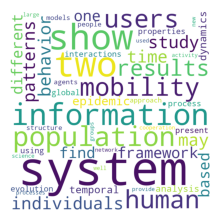

['Iyad Rahwan', 'Esteban Moro', 'Bruno Lepri']


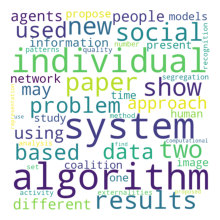

['Licia Capra', 'Vito Latora', 'Cecilia Mascolo']


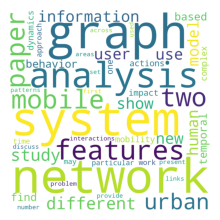

['János Kertész', 'Fabrizio Lillo', 'Jari Saramäki']


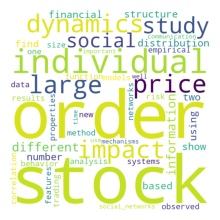

['Jon Kleinberg', 'Duncan J. Watts', 'Sharad Goel']


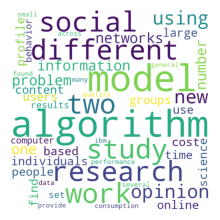

['Denny Borsboom', 'Sacha Epskamp', 'Marieke Wichers']


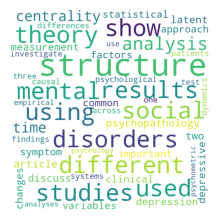

['Nicholas A. Christakis', 'David G. Rand', 'Daniel J. Corsi']


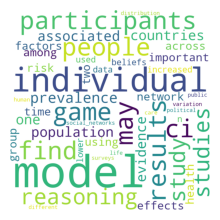

['Rens Vliegenthart', 'Boleslaw K. Szymanski', 'Helen Margetts']


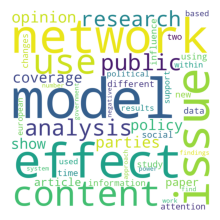

['Filippo Menczer', 'Alessandro Flammini', 'Santo Fortunato']


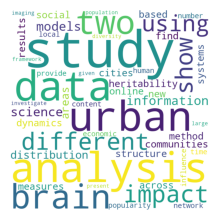

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Author_df = pd.read_csv('data/IC2S2_all_authors.csv')
#print(list(Author_df.loc[Author_df['id']==Top3].display_name))

def generate_wordcloud(data):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(data)
    plt.figure(figsize = (2,2), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

for c in Top_9_communities:
    
    Top_com_authors = [list(Author_df.loc[Author_df['id']==top_authors[c][i]].display_name)[0] for i in range(3)]
    
    top_tfidf_words= [word[0] for word in sorted(tfidf_scores[c].items(), key=lambda x: x[1], reverse=True)[:50]] 
    
    data = " ".join(top_tfidf_words)
    print(Top_com_authors)
    generate_wordcloud(data)
    

# References

[1] http://networksciencebook.com/chapter/3